# Лабораторная работа 3

Проверка GPU

In [1]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15771808306142461155
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3444506624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 201253789323700463
physical_device_desc: "device: 0, name: GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


### Задание 1

Импортируем датасет

In [48]:
import pandas as pd

df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


<AxesSubplot:xlabel='category', ylabel='count'>

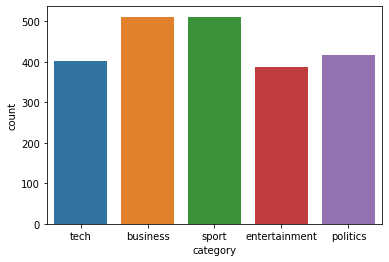

In [49]:
import seaborn as sns

sns.countplot(x=df['category'])

Смотрим пример данных

In [50]:
df['text'][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

Подготавливаем датасет для работы с моделью

In [51]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    # text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to /home/lxzrv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Проверяем

In [52]:
print(clean_text(df['text'][10]))
len(clean_text(df['text'][10]).split(' '))

berlin cheers antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing antinazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses si days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize festival

181

Применяем ко всем

In [53]:
df['text']=df['text'].apply(clean_text)

Переводим слова в коды

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


In [55]:
df['text']

0       tv future hands viewers home theatre systems p...
1       worldcom boss left books alone former worldcom...
2       tigers wary farrell gamble leicester say rushe...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raids bo office ocean twelve crim...
                              ...                        
2220    cars pull us retail figures us retail sales fe...
2221    kilroy unveils immigration policy echatshow ho...
2222    rem announce new glasgow concert us band rem a...
2223    political squabbles snowball become commonplac...
2224    souness delight euro progress boss graeme soun...
Name: text, Length: 2225, dtype: object

In [56]:
df['text'] = tokenizer.texts_to_sequences(df['text'].values)

In [57]:
df['text']

0       [84, 143, 1155, 1137, 45, 1047, 690, 5103, 118...
1       [1537, 591, 262, 1552, 1415, 106, 1537, 591, 5...
2       [4881, 6893, 3719, 6444, 1191, 64, 5106, 212, ...
3       [11020, 294, 1029, 1478, 219, 971, 181, 1029, ...
4       [3721, 4885, 5705, 332, 165, 3721, 4885, 961, ...
                              ...                        
2220    [1809, 2579, 7, 1185, 185, 7, 1185, 88, 589, 3...
2221    [4660, 4824, 669, 442, 20348, 833, 820, 947, 2...
2222    [5956, 2064, 6, 1627, 1950, 7, 341, 5956, 305,...
2223    [343, 10078, 32470, 209, 7066, 2662, 59, 95, 2...
2224    [2397, 7903, 859, 1157, 591, 5346, 2397, 931, ...
Name: text, Length: 2225, dtype: object

In [58]:
df['len'] = df['text'].str.len()

In [59]:
df = df.sort_values(by='len')

In [60]:
df

,category,text,len
323,politics,"[938, 7182, 52, 554, 11383, 221, 293, 938, 193...",48
1768,sport,"[12792, 7903, 3331, 3165, 380, 855, 12792, 671...",62
529,sport,"[1029, 315, 10575, 1029, 380, 5346, 2397, 2414...",64
91,sport,"[9951, 8183, 660, 295, 629, 167, 1384, 13043, ...",68
810,sport,"[2903, 1710, 6, 1054, 629, 167, 3233, 8326, 29...",72
...,...,...,...
880,entertainment,"[6427, 1439, 6042, 1868, 6, 10786, 480, 3480, ...",1254
482,tech,"[1277, 163, 540, 163, 255, 240, 51, 17019, 170...",1488
677,politics,"[1324, 1510, 843, 8659, 1324, 1510, 211, 563, ...",1696
1615,entertainment,"[4350, 3728, 2997, 3297, 7, 341, 4350, 3728, 5...",1825


In [61]:
max_len = max([len(text) for text in df['text']])
print('Maximum sequence length in the list of sentences:', max_len)

Maximum sequence length in the list of sentences: 2213


In [62]:
Y, desc = pd.factorize(df['category'])
print(Y)
print(desc)

[0 1 1 ... 0 3 0]
Index(['politics', 'sport', 'business', 'entertainment', 'tech'], dtype='object')


In [63]:
X = df['text'].values
X

array([list([938, 7182, 52, 554, 11383, 221, 293, 938, 193, 1641, 8231, 152, 52, 305, 412, 22, 32, 161, 92, 482, 2590, 353, 1120, 22170, 1151, 3547, 599, 16526, 1169, 3, 2061, 2222, 599, 87, 52, 554, 359, 59, 1664, 927, 1639, 412, 11034, 570, 1120, 434, 43, 825]),
       list([12792, 7903, 3331, 3165, 380, 855, 12792, 671, 2608, 13174, 1384, 20086, 3331, 1791, 2636, 12792, 1, 693, 55, 995, 2636, 1258, 560, 192, 2809, 20086, 995, 1637, 22, 48, 6581, 68, 668, 142, 7, 1022, 257, 1383, 228, 559, 727, 1991, 78, 12792, 7932, 1750, 3165, 415, 479, 1, 430, 148, 142, 7918, 2034, 1109, 82, 218, 70, 5, 224, 1397]),
       list([1029, 315, 10575, 1029, 380, 5346, 2397, 2414, 2012, 408, 2443, 17198, 10575, 1659, 3201, 23224, 2397, 4095, 9438, 810, 113, 475, 1054, 2032, 3103, 655, 217, 10575, 971, 57, 1268, 929, 408, 23225, 23226, 6111, 4174, 4356, 284, 2397, 3, 1786, 12966, 943, 78, 1, 1414, 431, 707, 137, 260, 11, 1022, 98, 310, 1847, 1, 129, 9, 70, 3633, 1163, 419, 395]),
       ...,
       list(

In [78]:
X = pad_sequences(X, maxlen=max_len, padding="post")

In [79]:
X

array([[  938,  7182,    52, ...,     0,     0,     0],
       [12792,  7903,  3331, ...,     0,     0,     0],
       [ 1029,   315, 10575, ...,     0,     0,     0],
       ...,
       [ 1324,  1510,   843, ...,     0,     0,     0],
       [ 4350,  3728,  2997, ...,     0,     0,     0],
       [ 1442,  1148,  8413, ...,  8265,   432,  5378]], dtype=int32)

In [37]:
batch = 32
def train_generator():
    start = 0
    end = batch
    x_length = len(X)
    
    while True:
        curr_max_len = max([len(text) for text in df['text'][start:end]])
        # print(f'batch: {i}:{i+batch}; max_len:{curr_max_len}')
        x_train = pad_sequences(X[start:end], maxlen=curr_max_len, padding="post")
        y_train = Y[start:end]
        yield x_train, y_train
        
        start += batch
        end += batch
        
        if end > x_length:
            start = 0
            end = batch

In [38]:
[i for i in train_generator()]

[(array([[  938,  7182,    52, ...,     0,     0,     0],
         [12792,  7903,  3331, ...,     0,     0,     0],
         [ 1029,   315, 10575, ...,     0,     0,     0],
         ...,
         [  373,  6063,  9950, ...,    74,   733,   376],
         [ 4381,  2479,  2607, ...,   791,   240,  1592],
         [12738,   427,  5362, ...,   775,    13,   284]], dtype=int32),
  array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1])),
 (array([[ 3938,  1265,   186, ...,     0,     0,     0],
         [ 1118,  7587,   314, ...,     0,     0,     0],
         [ 4381,  1334,   896, ...,     0,     0,     0],
         ...,
         [ 3332,  3494,  7836, ...,   702, 15303,     1],
         [ 6277,  3005,  4627, ...,   346, 10220,   849],
         [ 8148,    20,  6126, ...,  4329,   544,   107]], dtype=int32),
  array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1,
         3, 1, 1, 1, 2, 1, 1, 2, 1, 1])),
 (array([[  

Строим модель

In [82]:
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Embedding,Bidirectional

numFeatures = 40 # число признаков (число входов LSTM)
numHidden   = 40 # число скрытых блоков LSTM
numClasses  = desc.shape[0] # число итоговых классов
vocabSize   = len(word_index) + 1 # размер словаря (количество слов)
#inputLength = X.shape[1]

model = Sequential() # строим модель на основе стека слоев
model.add(Embedding(vocabSize, numFeatures, input_length=max_len))# перекодируем целочисленный код слова в вектор признаков
model.add(Bidirectional(LSTM(numHidden, return_sequences=False)))# возвращает одно значение, а не последовательность
model.add(Dense(numClasses, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2213, 40)          1299440   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80)                25920     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 405       
Total params: 1,325,765
Trainable params: 1,325,765
Non-trainable params: 0
_________________________________________________________________


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

In [87]:
X_train.shape

(2002, 2213)

In [86]:
X_test.shape

(223, 2213)

Обучаем

In [88]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(
    X_train,
    Y_train,
    shuffle=False,
    epochs=5,
    batch_size=32
)

Epoch 1/5
63/63 [==============================] - 13s 179ms/step - loss: 1.5778 - accuracy: 0.2330
Epoch 2/5
63/63 [==============================] - 12s 185ms/step - loss: 1.1227 - accuracy: 0.5040
Epoch 3/5
63/63 [==============================] - 12s 186ms/step - loss: 0.8025 - accuracy: 0.7679
Epoch 4/5
63/63 [==============================] - 12s 185ms/step - loss: 0.4077 - accuracy: 0.9297
Epoch 5/5
63/63 [==============================] - 12s 187ms/step - loss: 0.1796 - accuracy: 0.9878


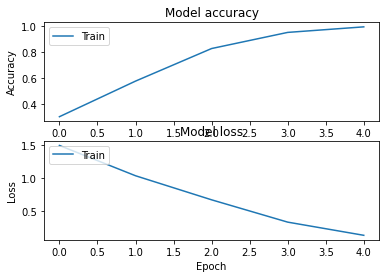

In [92]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [93]:
_, accuracy = model.evaluate(X_test, Y_test)
accuracy

7/7 [==============================] - 1s 83ms/step - loss: 0.2111 - accuracy: 0.9596


0.9596412777900696

### Задание 2

Загружаем данные NASA

In [99]:
!curl https://ti.arc.nasa.gov/m/project/prognostic-repository/CMAPSSData.zip -o CMAPSSData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.8M  100 11.8M    0     0  1035k      0  0:00:11  0:00:11 --:--:-- 1310k


In [103]:
!unzip CMAPSSData.zip -d CMAPSSData/

Archive:  CMAPSSData.zip
  inflating: CMAPSSData/Damage Propagation Modeling.pdf  
  inflating: CMAPSSData/readme.txt   
  inflating: CMAPSSData/RUL_FD001.txt  
  inflating: CMAPSSData/RUL_FD002.txt  
  inflating: CMAPSSData/RUL_FD003.txt  
  inflating: CMAPSSData/RUL_FD004.txt  
  inflating: CMAPSSData/test_FD001.txt  
  inflating: CMAPSSData/test_FD002.txt  
  inflating: CMAPSSData/test_FD003.txt  
  inflating: CMAPSSData/test_FD004.txt  
  inflating: CMAPSSData/train_FD001.txt  
  inflating: CMAPSSData/train_FD002.txt  
  inflating: CMAPSSData/train_FD003.txt  
  inflating: CMAPSSData/train_FD004.txt  


In [289]:
!cat CMAPSSData/readme.txt

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine � i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

Проверяем структуру данных

In [619]:
!head CMAPSSData/test_FD001.txt -n 3

1 1 0.0023 0.0003 100.0 518.67 643.02 1585.29 1398.21 14.62 21.61 553.90 2388.04 9050.17 1.30 47.20 521.72 2388.03 8125.55 8.4052 0.03 392 2388 100.00 38.86 23.3735  
1 2 -0.0027 -0.0003 100.0 518.67 641.71 1588.45 1395.42 14.62 21.61 554.85 2388.01 9054.42 1.30 47.50 522.16 2388.06 8139.62 8.3803 0.03 393 2388 100.00 39.02 23.3916  
1 3 0.0003 0.0001 100.0 518.67 642.46 1586.94 1401.34 14.62 21.61 554.11 2388.05 9056.96 1.30 47.50 521.97 2388.03 8130.10 8.4441 0.03 393 2388 100.00 39.08 23.4166  


In [620]:
!head CMAPSSData/RUL_FD001.txt -n 3

112 
98 
69 


Предобрабатываем данные

In [629]:
import pandas as pd

train_FD001 = pd.read_csv('CMAPSSData/train_FD001.txt', header=None, delim_whitespace=True)
test_FD001 = pd.read_csv('CMAPSSData/test_FD001.txt', header=None, delim_whitespace=True)
test_RUL_FD001 = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None, delim_whitespace=True)

In [630]:
train_FD001

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [631]:
max_cycles = train_FD001.loc[:,:1].groupby(0).max(1)
train_RUL_FD001 = max_cycles.to_numpy()
train_RUL_FD001[:10]

array([[192],
       [287],
       [179],
       [189],
       [269],
       [188],
       [259],
       [150],
       [201],
       [222]])

In [632]:
train_FD001_engine_groups = []

for i, group in train_FD001.groupby(0):
    train_FD001_engine_groups.append(group.loc[:,2:].to_numpy())

train_FD001_engine_groups_padded = pad_sequences(train_FD001_engine_groups, padding="pre", dtype='float32')

In [633]:
test_FD001_engine_groups = []

for i, group in test_FD001.groupby(0):
    test_FD001_engine_groups.append(group.loc[:,2:].to_numpy())
    
test_FD001_engine_groups_padded = pad_sequences(test_FD001_engine_groups, padding="pre", dtype='float32')

In [638]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

def train_generator_2():
    min_cycles = 30
    batch_size = 40  
    current_engine = 0
    
    while True: 
        current_batch_data = train_FD001_engine_groups[current_engine]
        current_batch_data_length = current_batch_data.shape[0]
        #batch_step = current_batch_data_length // batch_size
        batch_len_range = [x for x in range(min_cycles, current_batch_data_length, 1)]
        
        x_train = []
        y_train = []
        for train_size in batch_len_range:
            x_item_tmp = train_FD001_engine_groups[current_engine][0:train_size]
            x_train.append(x_item_tmp)
            y_train.append(train_RUL_FD001[current_engine].item() - x_item_tmp.shape[0])
        
        x_train = pad_sequences(x_train, maxlen=current_batch_data_length, padding="pre", dtype='float32')
        y_train = np.array(y_train)
        
        yield x_train, y_train
        
        current_engine += 1
        if current_engine == 100:
            current_engine = 0
            
def valid_generator_2():
    current_engine = 0
    
    while True: 
        x_train = []
        y_train = []
        
        x_train.append(test_FD001_engine_groups[current_engine])
        y_train.append(RUL_FD001.loc[current_engine].item())
        
        x_train = np.asarray(x_train)
        y_train = np.asarray(y_train)
        
        yield x_train, y_train
        
        current_engine += 1
        if current_engine == 100:
            current_engine = 0

Проверяем генераторы

In [641]:
my_train_gen = train_generator_2()
my_valid_gen = valid_generator_2()

In [647]:
x_train, y_train = next(my_train_gen)
from pprint import pprint
pprint(x_train.shape)
pprint(y_train.shape)

(159, 189, 24)
(159,)


In [644]:
x_valid, y_valid = next(my_valid_gen)
from pprint import pprint
pprint(x_valid.shape)
pprint(y_valid.shape)

(1, 49, 24)
(1,)


In [674]:
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Embedding,Bidirectional, Dropout, BatchNormalization

numFeatures  = 24  # число признаков (число входов сети).
numHiddenUnits  = 100 # число скрытых блоков 
LSTMnumResponses  = 1 # число выходов для слоя регрессии

model = Sequential() # строим модель на основе стека слоев
model.add(LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, numFeatures)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(LSTMnumResponses))

model.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 100)               50000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 101       
Total params: 50,501
Trainable params: 50,301
Non-trainable params: 200
_________________________________________________________________


In [675]:
from keras.callbacks import EarlyStopping

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(
    train_generator_2(),
    validation_data=valid_generator_2(),
    validation_steps=100,
    epochs=100,
    steps_per_epoch=100,
    shuffle=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/100
100/100 [==============================] - 4s 28ms/step - loss: 11657.1420 - val_loss: 7134.6738
Epoch 2/100
100/100 [==============================] - 2s 25ms/step - loss: 10865.9962 - val_loss: 6351.5620
Epoch 3/100
100/100 [==============================] - 2s 24ms/step - loss: 9416.6193 - val_loss: 5208.2109
Epoch 4/100
100/100 [==============================] - 2s 24ms/step - loss: 7541.0817 - val_loss: 3931.2676
Epoch 5/100
100/100 [==============================] - 2s 24ms/step - loss: 5650.1502 - val_loss: 2852.5510
Epoch 6/100
100/100 [==============================] - 2s 24ms/step - loss: 4211.1641 - val_loss: 2263.1257
Epoch 7/100
100/100 [==============================] - 2s 25ms/step - loss: 3039.2857 - val_loss: 1910.3746
Epoch 8/100
100/100 [==============================] - 2s 25ms/step - loss: 2614.0965 - val_loss: 1842.8174
Epoch 9/100
100/100 [==============================] - 2s 25ms/step - loss: 2086.9240 - val_loss: 1757.8025
Epoch 10/100
100/100 [====

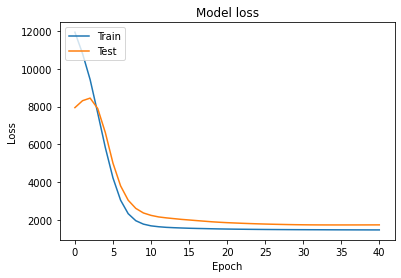

In [669]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

<AxesSubplot:ylabel='Density'>

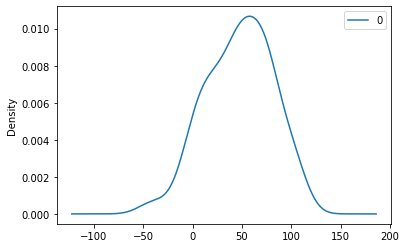

In [676]:
predict_results = model.predict(test_FD001_engine_groups_padded)
result_error = predict_results - RUL_FD001
result_error.plot.kde()

Плотность распределения ошибки